In [1]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_stock_prices.csv to cleaned_stock_prices.csv


Model Accuracy Comparison:
Logistic Regression Accuracy: 0.9804
Random Forest Accuracy: 1.0000


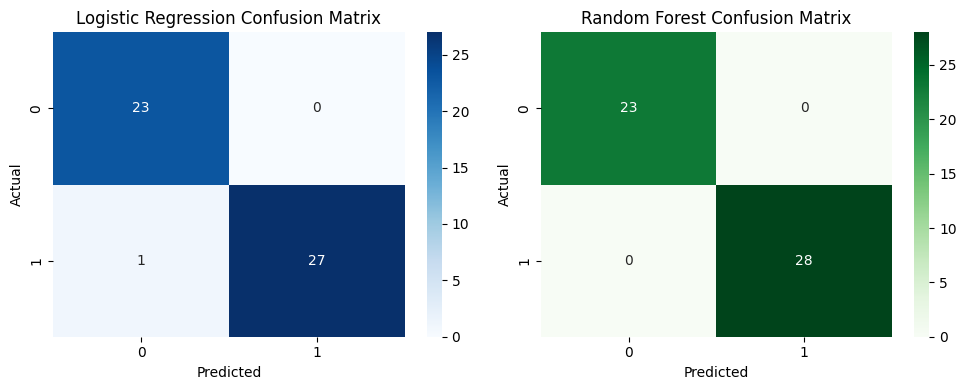


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.96      0.98        28

    accuracy                           0.98        51
   macro avg       0.98      0.98      0.98        51
weighted avg       0.98      0.98      0.98        51


Random Forest Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        28

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



['random_forest_model.pkl']

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
df = pd.read_csv("cleaned_stock_prices.csv")
for col in df.columns:
    df[col] = df[col].astype(str).str.replace(',', '').str.replace('%', '')
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.dropna(subset=['Price'])
df['Price_Change'] = df['Price'].diff()
df['Target'] = (df['Price_Change'] > 0).astype(int)
df = df.dropna(subset=['Target'])
drop_cols = ['Date', 'Price', 'Price_Change', 'Vol.', 'Change %']
X = df.drop(columns=[col for col in drop_cols if col in df.columns])
y = df['Target']
X = X.fillna(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
acc_log = accuracy_score(y_test, y_pred_log)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Model Accuracy Comparison:")
print(f"Logistic Regression Accuracy: {acc_log:.4f}")
print(f"Random Forest Accuracy: {acc_rf:.4f}")
fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Random Forest Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")
plt.tight_layout()
plt.show()
print("\nLogistic Regression Report:\n", classification_report(y_test, y_pred_log))
print("\nRandom Forest Report:\n", classification_report(y_test, y_pred_rf))
joblib.dump(log_model, 'logistic_model.pkl')
joblib.dump(rf_model, 'random_forest_model.pkl')


In [3]:
from google.colab import files
files.download('logistic_model.pkl')
files.download('random_forest_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>